### 1. Introdução e Coleta de Dados

#### Fonte dos Dados
Este projeto utiliza o **Spotify Tracks Dataset**, disponibilizado publicamente na plataforma Kaggle por Maharshi Pandya. O conjunto de dados contém características de áudio de faixas do Spotify em 125 gêneros diferentes.

* **Fonte Original:** Kaggle
* **Autor:** Maharshi Pandya
* **Link:** [Spotify Tracks Dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)

#### Licença
O dataset está licenciado sob a **Community Data License Agreement - Sharing - Version 1.0 (CDLA-Sharing-1.0)** ou similar (Kaggle Open Data), permitindo uso, modificação e compartilhamento para fins acadêmicos e de análise.

### Definição das Hipóteses de Modelagem

Neste projeto, investigaremos 4 hipóteses principais, aumentando a complexidade dos modelos estatísticos para entender as relações entre características musicais.

---

##### 1. Regressão Linear Simples
**Hipótese H1:** Existe uma relação física direta entre a energia e o volume de uma música?
* **Premissa:** Músicas percebidas como "enérgicas" são masterizadas com volumes mais altos (Loudness War).
* **Variáveis:**
    * $X$ (Independente): `energia`
    * $y$ (Alvo): `volume` (dB)

---

##### 2. Regressão Linear Múltipla
**Hipótese H2:** A "dancabilidade" pode ser explicada por uma combinação de fatores técnicos?
* **Premissa:** Uma música não é dançante apenas pelo ritmo. A combinação de andamento (BPM), intensidade (Energia) e positividade (Valência) define o quão dançante ela é.
* **Variáveis:**
    * $X$ (Independentes): `tempo_bpm`, `energia`, `valencia`
    * $y$ (Alvo): `dancabilidade`

---

##### 3. Regressão Polinomial
**Hipótese H3:** Existe uma "zona ideal" de BPM para dançar?
* **Premissa:** A relação entre BPM e Dancabilidade não é uma linha reta. Músicas muito lentas ou muito rápidas são menos dançantes; o ideal deve estar em uma faixa intermediária (curva).
* **Variáveis:**
    * $X$ (Independente): `tempo_bpm`
    * $y$ (Alvo): `dancabilidade`

---

##### 4. Classificação (Naive Bayes)
**Hipótese H4:** Os gêneros musicais possuem "assinaturas acústicas" matemáticas?
* **Premissa:** É possível prever o gênero de uma música desconhecida analisando apenas suas características técnicas (sem saber o artista ou nome).
* **Variáveis:**
    * $X$ (Features): Todas as colunas numéricas de áudio (`acustica`, `instrumental`, `energia`, etc.)
    * $y$ (Target): `genero` (Categoria)

##### Import das Bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##### Instanciando o dataset

In [4]:
df = pd.read_csv("..\\data\\raw\\dataset.csv")

In [5]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


##### Renomeando as colunas

In [6]:
df = df.rename(columns={
    "Unnamed: 0": "id",
    "track_id": "id_musica",
    "artists": "artistas",
    "album_name": "album",
    "track_name": "musica",
    "popularity": "popularidade",
    "duration_ms": "duracao_ms",
    "explicit": "explicita",
    "danceability": "dancabilidade",
    "energy": "energia",
    "key": "tom",
    "loudness": "volume",
    "mode": "modo",
    "speechiness": "falada",
    "acousticness": "acustica",
    "instrumentalness": "instrumental",
    "liveness": "ao_vivo",
    "valence": "valencia",
    "tempo": "tempo_bpm",
    "time_signature": "compasso",
    "track_genre": "genero"
})


##### Mudamos essa coluna booleana pra int, para ficar com os valores 0 e 1


In [7]:
df["explicita"] = df["explicita"].astype(int)


##### Drop na coluna track_id

In [8]:
df.drop(columns="id_musica", inplace=True)

In [9]:
df.head()

,id,artistas,album,musica,popularidade,duracao_ms,explicita,dancabilidade,energia,tom,volume,modo,falada,acustica,instrumental,ao_vivo,valencia,tempo_bpm,compasso,genero
0,0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


##### Dropando valores nulos

<p> haviam apenas três linhas com valores nulos, então dropá-las não vai afetar os resultados do nosso modelo
</p>

In [10]:
df.dropna(subset=["artistas", "album", "musica"], inplace=True)



In [11]:
df.isna().sum()

id               0
artistas         0
album            0
musica           0
popularidade     0
duracao_ms       0
explicita        0
dancabilidade    0
energia          0
tom              0
volume           0
modo             0
falada           0
acustica         0
instrumental     0
ao_vivo          0
valencia         0
tempo_bpm        0
compasso         0
genero           0
dtype: int64

##### Analisando informações e estatísticas descritivas

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             113999 non-null  int64  
 1   artistas       113999 non-null  object 
 2   album          113999 non-null  object 
 3   musica         113999 non-null  object 
 4   popularidade   113999 non-null  int64  
 5   duracao_ms     113999 non-null  int64  
 6   explicita      113999 non-null  int32  
 7   dancabilidade  113999 non-null  float64
 8   energia        113999 non-null  float64
 9   tom            113999 non-null  int64  
 10  volume         113999 non-null  float64
 11  modo           113999 non-null  int64  
 12  falada         113999 non-null  float64
 13  acustica       113999 non-null  float64
 14  instrumental   113999 non-null  float64
 15  ao_vivo        113999 non-null  float64
 16  valencia       113999 non-null  float64
 17  tempo_bpm      113999 non-null  fl

In [17]:
df.describe()

,id,popularidade,duracao_ms,explicita,dancabilidade,energia,tom,volume,modo,falada,acustica,instrumental,ao_vivo,valencia,tempo_bpm,compasso
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.085501,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.279627,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.000000,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.000000,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.000000,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


##### Plotagem de Gráficos e Insights

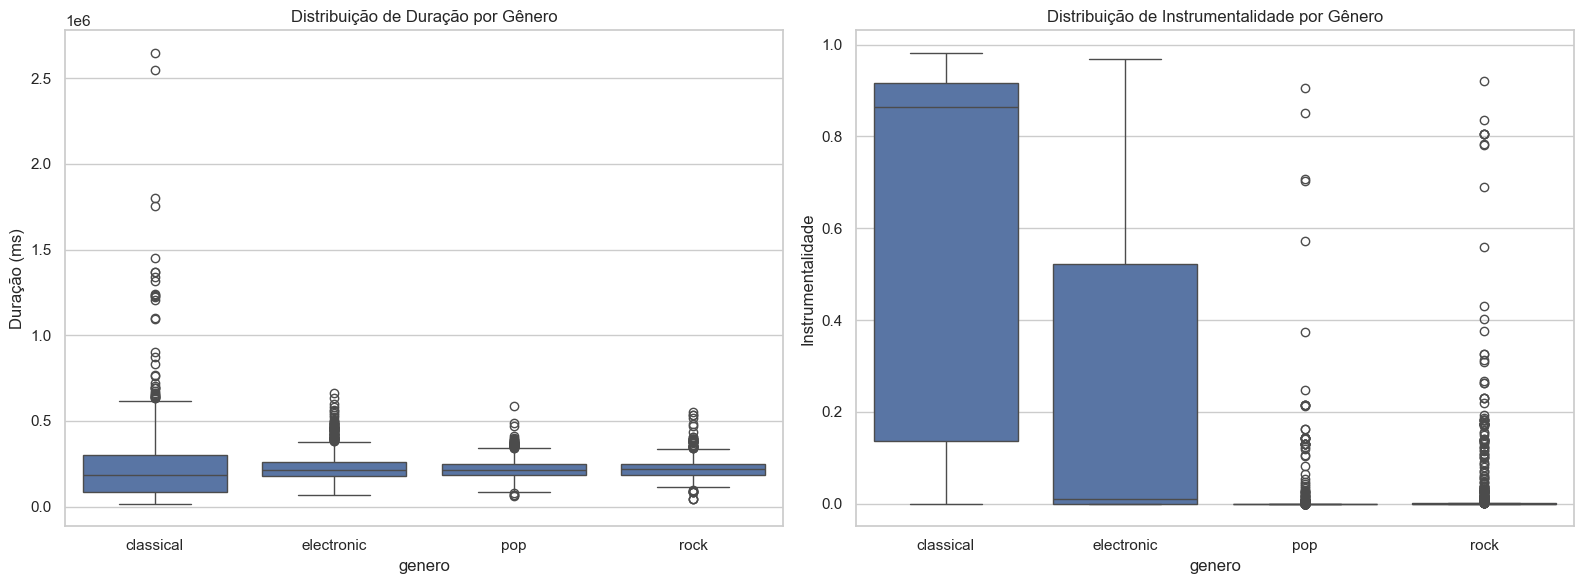

In [14]:
# Selecionando alguns gêneros contrastantes para exemplificar o contexto
generos_exemplo = ['classical', 'pop', 'electronic', 'rock']
df_contexto = df[df['genero'].isin(generos_exemplo)]

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando uma figura com 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Duração por Gênero
sns.boxplot(x='genero', y='duracao_ms', data=df_contexto, ax=axes[0])
axes[0].set_title('Distribuição de Duração por Gênero')
axes[0].set_ylabel('Duração (ms)')

# Gráfico 2: Instrumentalidade por Gênero
sns.boxplot(x='genero', y='instrumental', data=df_contexto, ax=axes[1])
axes[1].set_title('Distribuição de Instrumentalidade por Gênero')
axes[1].set_ylabel('Instrumentalidade')

plt.tight_layout()
plt.savefig('contexto_outliers_genero.png')


#### Boxplot 

 Duração (duracao_ms): O gênero Classical tem uma variação enorme (desvio padrão muito maior), com músicas curtíssimas e outras muito longas (até ~2,6 milhões de ms!). Já o Pop e Rock são muito mais "comportados". Se aplicássemos uma regra geral de corte, poderíamos apagar obras clássicas legítimas achando que são erros.

 Instrumentalidade (instrumental): Para Pop e Rock, qualquer valor alto é um outlier (a maioria está no zero). Mas para Classical, ter valores altos é o padrão. Cortar outliers gerais aqui destruiria a categoria de música clássica.

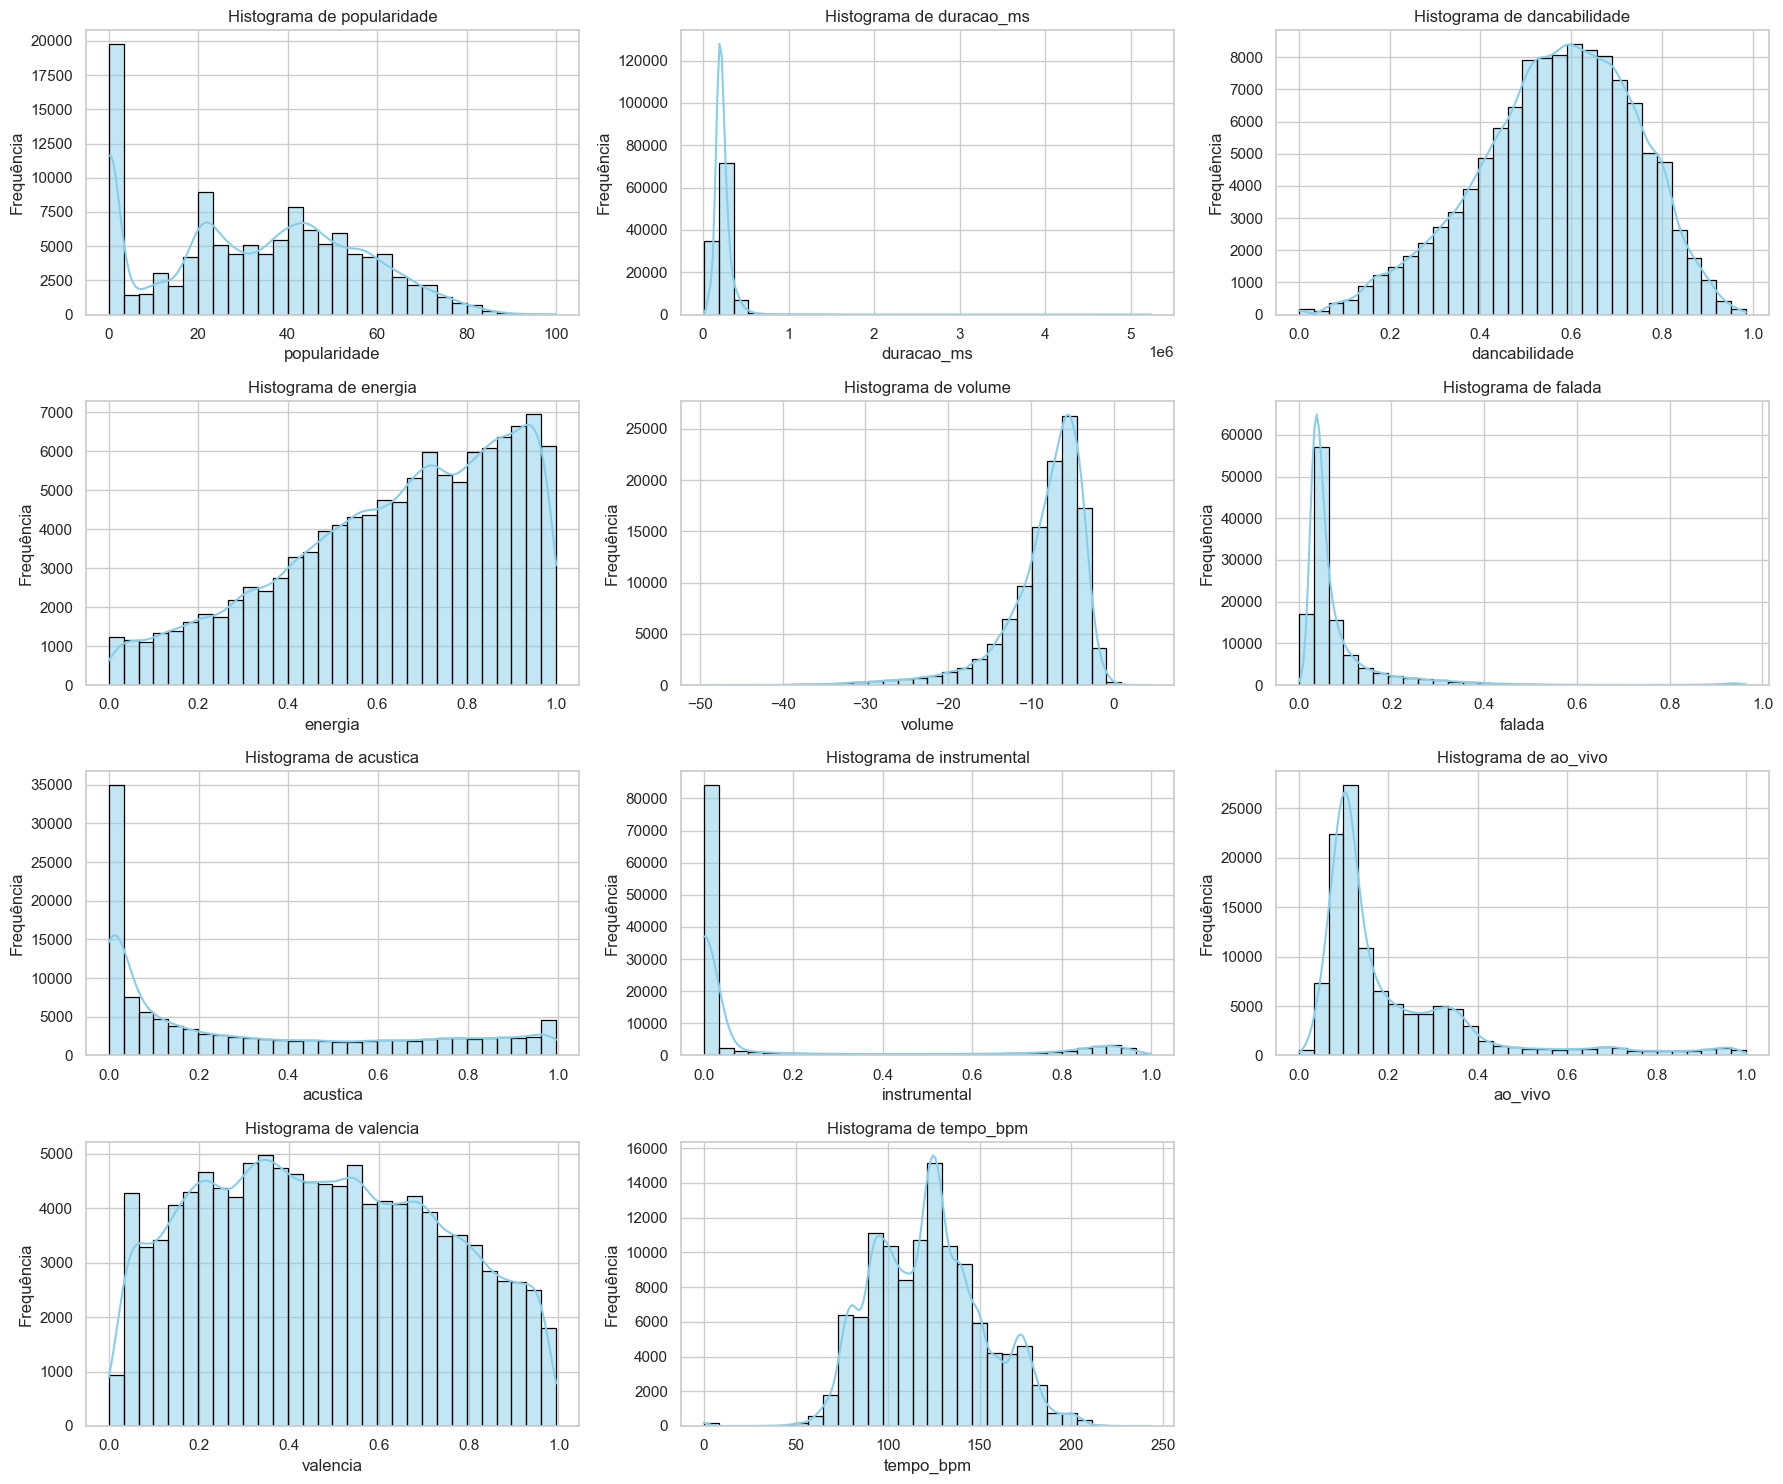

In [15]:
# Selecionar colunas numéricas de interesse
cols_numericas = ['popularidade', 'duracao_ms', 'dancabilidade', 'energia', 'volume', 
                  'falada', 'acustica', 'instrumental', 'ao_vivo', 'valencia', 'tempo_bpm']

# Configurar o tamanho da figura (canvas)
plt.figure(figsize=(18, 15))

# Loop para criar um histograma para cada coluna
for i, col in enumerate(cols_numericas):
    plt.subplot(4, 3, i + 1) # Cria uma grade de 4 linhas x 3 colunas
    # kde=True adiciona a linha suave da estimativa de densidade
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Histogramas

- Instrumental (instrumental): 
Veja como a barra está gigante no zero e tem uma cauda longa para a direita. Isso confirma que a maioria das músicas não é instrumental, e as que são instrumentais (valores altos) são os outliers nesse contexto global.

- Duração (duracao_ms): 
Parece uma curva de sino ("normal"), mas bem "espremida", com uma cauda longa à direita (músicas muito longas).

- Popularidade: 
Tem um pico estranho no zero. Isso pode indicar músicas sem dados de popularidade ou músicas muito obscuras que foram atribuídas como 0. Vale a pena investigar se esses "zeros" são reais ou dados faltantes preenchidos.

- Energia e Valência: 
Têm distribuições mais espalhadas e uniformes, o que é saudável para análise.

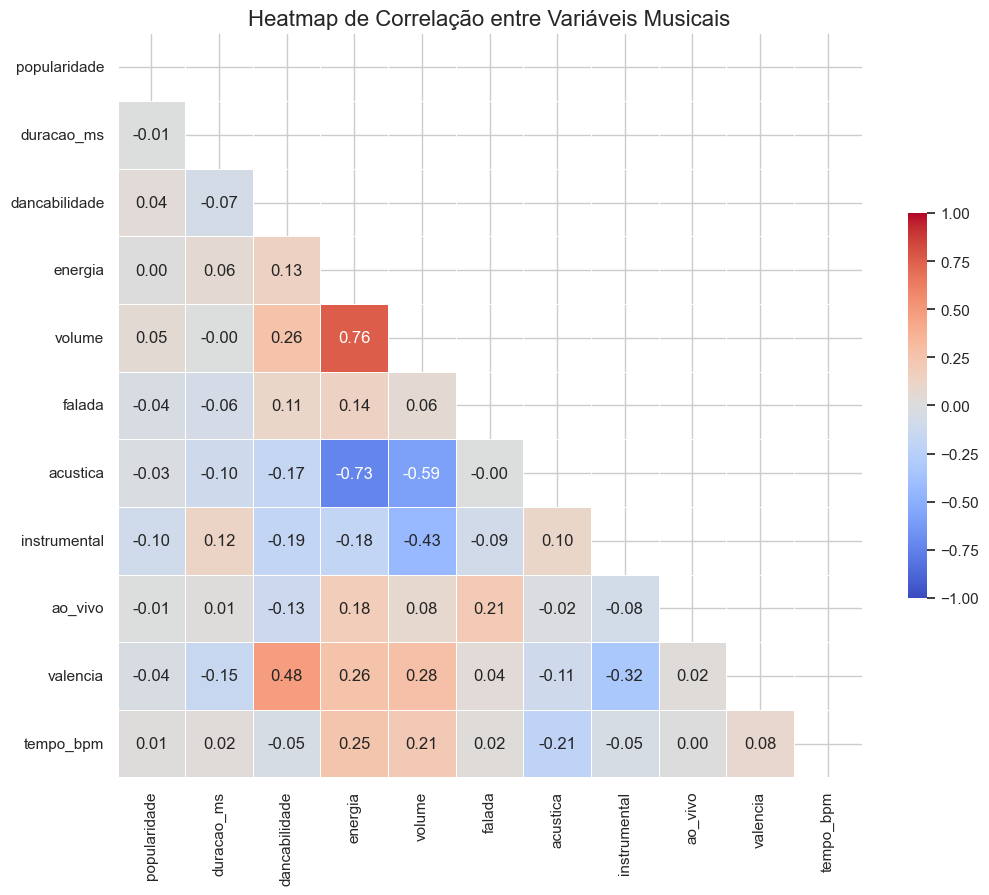

In [16]:
# Calculando a matriz de correlação
corr_matrix = df[cols_numericas].corr()

# Criando uma máscara para mostrar apenas uma matriz triangular inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# condigurando a figura
plt.figure(figsize=(12, 10))

# Plot do Heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', 
            vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap de Correlação entre Variáveis Musicais', fontsize=16)
plt.savefig('heatmap_correlacao.png')

#### HEATMAP

- Energia vs. Volume (0.76 - Forte Positiva):

    Como esperado, músicas com mais energia tendem a ser mais altas (volume maior). É a correlação mais forte do dataset.

- Energia vs. Acústica (-0.73 - Forte Negativa):

    Músicas acústicas tendem a ter menos energia. Isso faz sentido, já que o parâmetro "energia" do Spotify mede intensidade e atividade.

- Volume vs. Acústica (-0.59 - Negativa):

    Similar ao ponto anterior: músicas acústicas costumam ser mais "silenciosas" ou menos comprimidas sonoramente que faixas eletrônicas ou pop moderno.

- Dancabilidade vs. Valência (0.48 - Moderada Positiva):

    "Valência" mede o quão positiva/feliz a música soa. Músicas mais "dançáveis" tendem a ser mais alegres.

- Popularidade:

    Surpreendentemente, a popularidade não tem correlação muito forte com nenhuma característica específica isolada (todas as cores na linha popularidade são bem fracas/claras). Isso sugere que não existe uma "fórmula mágica" única (como "ser rápida" ou "ser alta") para uma música ser popular; depende de uma combinação complexa ou de fatores externos (marketing, artista).

- Instrumentalidade vs. Volume (-0.43):

    Faixas instrumentais tendem a ter volumes mais baixos (provavelmente devido à presença de música clássica ou ambiente no dataset).

### Gráfico da relação de "tempo_bpm" e "dancabilidade"

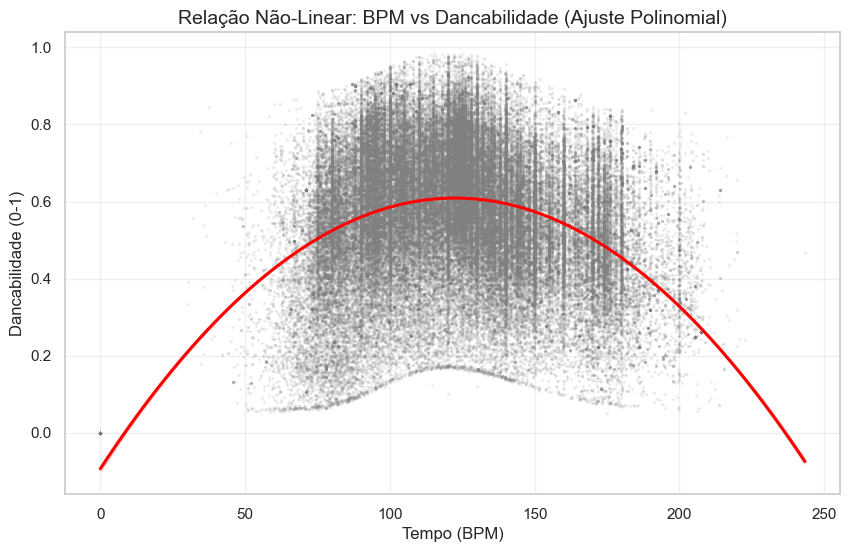

In [19]:
# 1. Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# 2. Gerar o gráfico (Scatterplot + Linha de Tendência Curva)
sns.regplot(
    data=df, 
    x='tempo_bpm', 
    y='dancabilidade', 
    # Configuração visual dos pontinhos (deixei cinza e transparentes para focar na linha)
    scatter_kws={'alpha': 0.1, 's': 2, 'color': 'gray'}, 
    # Configuração da linha de tendência (vermelha para destaque)
    line_kws={'color': 'red'},
    order=2 
)

# 3. Títulos e legendas
plt.title('Relação Não-Linear: BPM vs Dancabilidade (Ajuste Polinomial)', fontsize=14)
plt.xlabel('Tempo (BPM)')
plt.ylabel('Dancabilidade (0-1)')
plt.grid(True, alpha=0.3) # Grade suave no fundo

plt.show()

##### Tratamento de Outliers

<p> 
Primeiro vamos tratar os valores exagerados na coluna "duracao_ms" e removendo colunas desnecessárias
</p>

In [20]:
# 1. Filtragem de Outliers (Fundamental para Naive Bayes não distorcer a média)
# Regra: Duração entre 30s e 10min (margem segura para músicas), BPM válido entre 1 e 250
df_model = df[
    (df['duracao_ms'] >= 30000) & (df['duracao_ms'] <= 600000) &
    (df['tempo_bpm'] > 0) & (df['tempo_bpm'] <= 250)
].copy()

# Filtra apenas volumes "audíveis" (maiores que -35 dB)
# Isso remove as 189 faixas de erro/silêncio
df_model = df_model[df_model['volume'] >= -35]

# 2. Remover colunas irrelevantes (IDs e Textos livres)
cols_drop = ['id', 'musica', 'album', 'artistas']
df_model = df_model.drop(columns=cols_drop)

# 3. RESETAR O ÍNDICE (Importante! Como removemos linhas, o índice ficou "buracado")
df_model = df_model.reset_index(drop=True)

print("Status do Dataset para Naive Bayes:")
print(f"Linhas restantes: {len(df_model)}")
print("-" * 30)
print(df_model.info())

Status do Dataset para Naive Bayes:
Linhas restantes: 113038
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113038 entries, 0 to 113037
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   popularidade   113038 non-null  int64  
 1   duracao_ms     113038 non-null  int64  
 2   explicita      113038 non-null  int32  
 3   dancabilidade  113038 non-null  float64
 4   energia        113038 non-null  float64
 5   tom            113038 non-null  int64  
 6   volume         113038 non-null  float64
 7   modo           113038 non-null  int64  
 8   falada         113038 non-null  float64
 9   acustica       113038 non-null  float64
 10  instrumental   113038 non-null  float64
 11  ao_vivo        113038 non-null  float64
 12  valencia       113038 non-null  float64
 13  tempo_bpm      113038 non-null  float64
 14  compasso       113038 non-null  int64  
 15  genero         113038 non-n

<p>
Após esses tratamentos removemos apenas 0,84% dos dados (961 linhas)
</p>

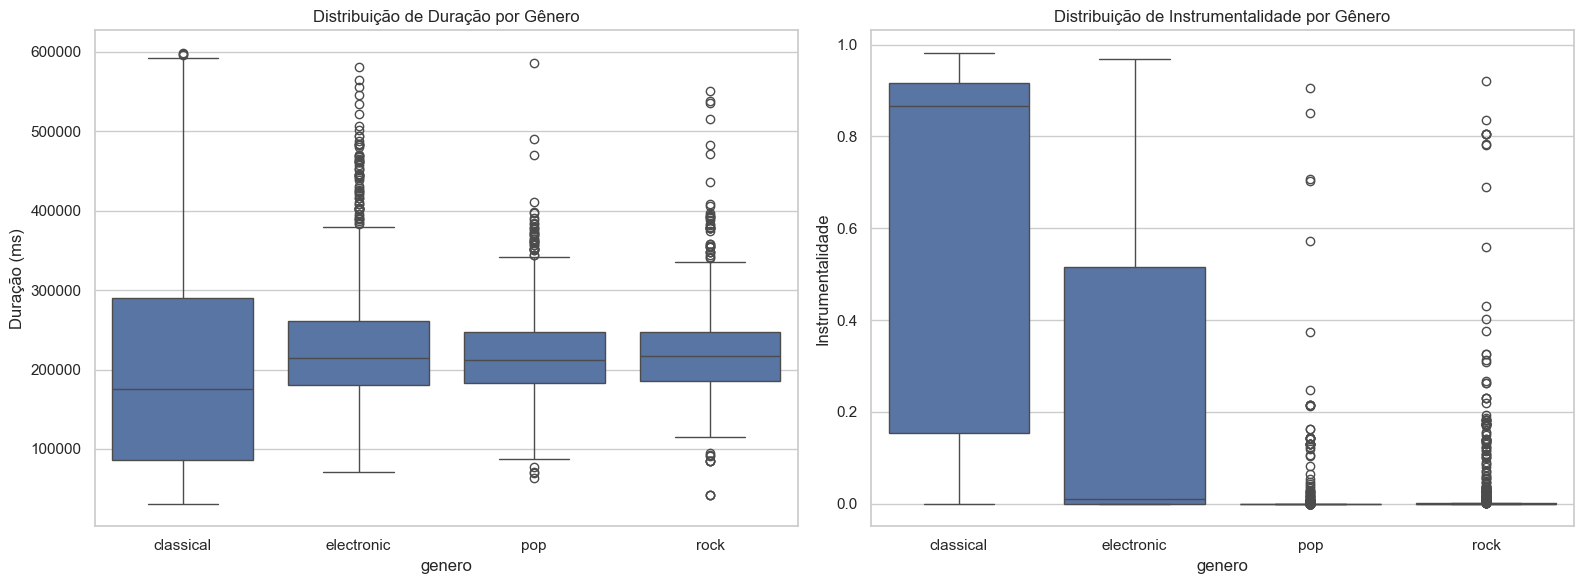

In [22]:

generos_exemplo = ['classical', 'pop', 'electronic', 'rock']
df_contexto = df_model[df_model['genero'].isin(generos_exemplo)]

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='genero', y='duracao_ms', data=df_contexto, ax=axes[0])
axes[0].set_title('Distribuição de Duração por Gênero')
axes[0].set_ylabel('Duração (ms)')

sns.boxplot(x='genero', y='instrumental', data=df_contexto, ax=axes[1])
axes[1].set_title('Distribuição de Instrumentalidade por Gênero')
axes[1].set_ylabel('Instrumentalidade')

plt.tight_layout()
plt.savefig('contexto_outliers_genero.png')

In [21]:
df_model.to_csv("../data/processed/dataset_limpo.csv", index=False)